In [22]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Sentiment Data Joko Widodo_2019.csv")

In [3]:
df.head()

,score,text,class
0,-1,oh nyata pocong pakai siri,Negative
1,-4,nyamuk datang lah ada tanggal lah kakak ponti...,Negative
2,0,foto awkarin jadi poconggak sambung,Neutral
3,0,maklum kalau pocong banyak tanya kan di kubur...,Neutral
4,4,benar aku tak larat sangat deh ini tapi sebab ...,Positive


In [4]:
df.shape

(1000, 3)

In [5]:
df["class"].nunique()

3

In [6]:
df = df.drop(['score'], axis=1)

In [7]:
df

,text,class
0,oh nyata pocong pakai siri,Negative
1,nyamuk datang lah ada tanggal lah kakak ponti...,Negative
2,foto awkarin jadi poconggak sambung,Neutral
3,maklum kalau pocong banyak tanya kan di kubur...,Neutral
4,benar aku tak larat sangat deh ini tapi sebab ...,Positive
...,...,...
995,rt pocong sudah balik ke twitterawkarin sudah ...,Neutral
996,rt pocong sudah balik ke twitterawkarin sudah ...,Neutral
997,good job min kalo mau bikin meta sebar pocong...,Positive
998,rt lah pocong mah sudah hits duluan keleusss,Neutral


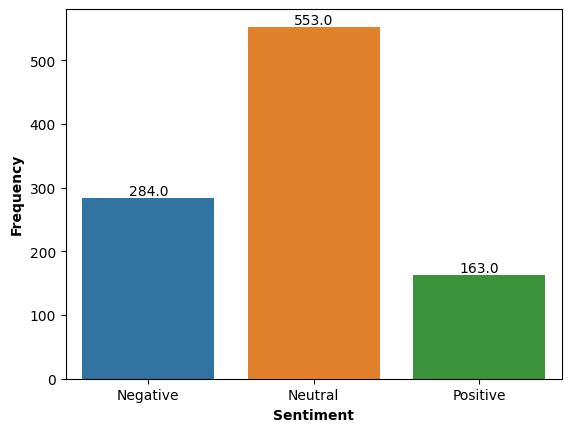

In [12]:
ax = sns.countplot(x='class', data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel("Sentiment", fontweight = 'bold')
plt.ylabel("Frequency", fontweight = 'bold')
plt.show()

In [13]:
vocab_size = 1000
embeding_dim = 16
max_length = 80
trunc_type = 'post'
paddung_type = 'post'
OOV_tok = '<OOV>'


In [34]:
sentences = df['text']
labels = df['class']

sentences_train, sentences_test, labels_train, labels_test = train_test_split(
    sentences,
    labels,
    train_size=0.8,
    shuffle=False
)

tokenizer = Tokenizer(
    num_words = vocab_size,
    oov_token = OOV_tok
)

tokenizer.fit_on_texts(sentences_train)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(sentences_train)
sentences_train = pad_sequences(
    train_sequences,
    maxlen = max_length,
    truncating = trunc_type,
    padding = paddung_type
)

test_sequences = tokenizer.texts_to_sequences(sentences_test)
sentences_test = pad_sequences(
    test_sequences,
    maxlen = max_length,
    truncating = trunc_type,
    padding = paddung_type
)
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)
labels_train = np.array(label_tokenizer.texts_to_sequences(labels_train))
labels_test = np.array(label_tokenizer.texts_to_sequences(labels_test))


In [72]:
model_sentiment_analysis = tf.keras.Sequential([tf.keras.layers.Embedding(vocab_size, embeding_dim, input_length=max_length),
                                                tf.keras.layers.GlobalAveragePooling1D(),
                                                tf.keras.layers.Dense(24, activation='relu'),
                                                tf.keras.layers.Dense(12, activation='relu'),
                                                tf.keras.layers.Dense(6, activation='sigmoid')
])

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') is not None and logs.get('val_accuracy') is not None:
            if logs.get('accuracy') > 0.85 and logs.get('val_accuracy') > 0.85:
                self.model.stop_training = True
                
callbacks = myCallback()

In [73]:
model_sentiment_analysis.compile(loss='sparse_categorical_crossentropy',
                                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                                 metrics=['accuracy']
              )

model_sentiment_analysis.fit(sentences_train,
                             labels_train,
                             epochs=1000,
                             validation_data=(sentences_test, labels_test),
                             callbacks=callbacks
                             )

Epoch 1/1000
25/25 [==============================] - 1s 7ms/step - loss: 1.2718 - accuracy: 0.5163 - val_loss: 0.9139 - val_accuracy: 0.6400
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.9764 - accuracy: 0.5437 - val_loss: 0.9017 - val_accuracy: 0.6650
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.9269 - accuracy: 0.5688 - val_loss: 0.7461 - val_accuracy: 0.6650
Epoch 4/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.8575 - accuracy: 0.5950 - val_loss: 0.6700 - val_accuracy: 0.6900
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7513 - accuracy: 0.6825 - val_loss: 0.6243 - val_accuracy: 0.7550
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6392 - accuracy: 0.7188 - val_loss: 0.6107 - val_accuracy: 0.7650
Epoch 7/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.5429 - accuracy: 0.7625 - val_loss: 0.7446 - val_accuracy: 0.7250
Epoch 

In [167]:
model_sentiment_analysis.save('model_sentiment_analysis.h5')

c:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [168]:
data_anies = pd.read_csv('data_anies.csv')
data_prabowo = pd.read_csv('data_prabowo.csv')
data_ganjar = pd.read_csv('data_ganjar.csv')

In [169]:
text_predict_anies = data_anies['Tweet'].astype(str)
text_predict_prabowo = data_prabowo['Tweet'].astype(str)
text_predict_ganjar = data_ganjar['Tweet'].astype(str)

In [170]:
sequences_predict_anies = tokenizer.texts_to_sequences(text_predict_anies)
sentences_predict_anies = pad_sequences(
    sequences_predict_anies,
    maxlen = max_length,
    truncating = trunc_type,
    padding = paddung_type
)

sequences_predict_prabowo = tokenizer.texts_to_sequences(text_predict_prabowo)
sentences_predict_prabowo = pad_sequences(
    sequences_predict_prabowo,
    maxlen = max_length,
    truncating = trunc_type,
    padding = paddung_type
)

sequences_predict_ganjar = tokenizer.texts_to_sequences(text_predict_ganjar)
sentences_predict_ganjar = pad_sequences(
    sequences_predict_ganjar,
    maxlen = max_length,
    truncating = trunc_type,
    padding = paddung_type
)

In [171]:
predictions_anies = model_sentiment_analysis.predict(sentences_predict_anies)
predictions_prabowo = model_sentiment_analysis.predict(sentences_predict_prabowo)
predictions_ganjar = model_sentiment_analysis.predict(sentences_predict_ganjar)

7/7 [==============================] - 0s 2ms/step


7/7 [==============================] - 0s 1ms/step


In [172]:
predicted_class_anies = np.argmax(predictions_anies, axis=1)
predicted_class_prabowo = np.argmax(predictions_prabowo, axis=1)
predicted_class_ganjar = np.argmax(predictions_ganjar, axis=1)

In [173]:
predicted_labels_anies = label_tokenizer.sequences_to_texts(predicted_class_anies.reshape(-1,1))
predicted_labels_prabowo = label_tokenizer.sequences_to_texts(predicted_class_prabowo.reshape(-1,1))
predicted_labels_ganjar = label_tokenizer.sequences_to_texts(predicted_class_ganjar.reshape(-1,1))

In [174]:
data_anies['Sentiment'] = predicted_labels_anies
data_prabowo['Sentiment'] = predicted_labels_prabowo
data_ganjar['Sentiment'] = predicted_labels_ganjar

In [175]:
data_anies[['Tweet','Sentiment']].to_csv('sentiment_anies.csv')
data_prabowo[['Tweet','Sentiment']].to_csv('sentiment_prabowo.csv')
data_ganjar[['Tweet','Sentiment']].to_csv('sentiment_ganjar.csv')

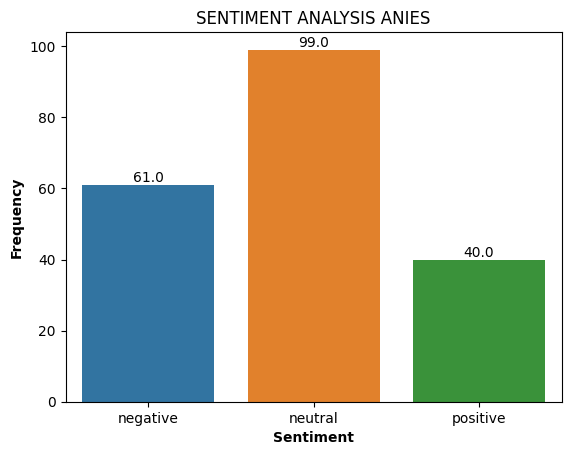

In [176]:
order = ['negative', 'neutral', 'positive']
ax_anies = sns.countplot(x='Sentiment', data=data_anies, order=order)
for p in ax_anies.patches:
    ax_anies.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel("Sentiment", fontweight = 'bold')
plt.ylabel("Frequency", fontweight = 'bold')
plt.title("SENTIMENT ANALYSIS ANIES")
plt.show()

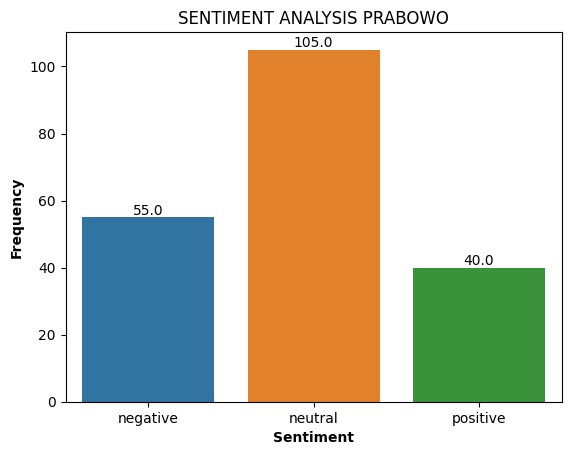

In [177]:
order = ['negative', 'neutral', 'positive']
ax_prabowo = sns.countplot(x='Sentiment', data=data_prabowo, order=order)
for p in ax_prabowo.patches:
    ax_prabowo.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel("Sentiment", fontweight = 'bold')
plt.ylabel("Frequency", fontweight = 'bold')
plt.title("SENTIMENT ANALYSIS PRABOWO")
plt.show()

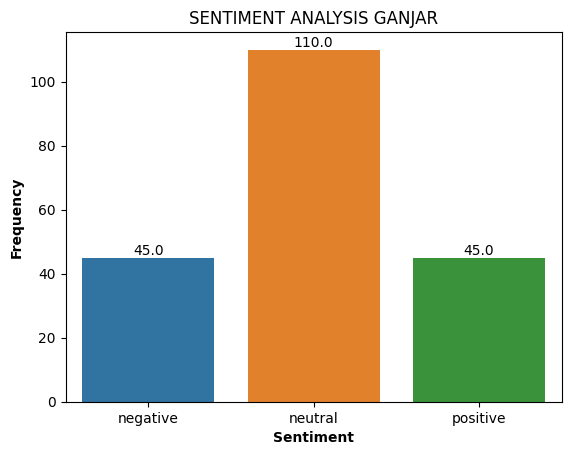

In [178]:
order = ['negative', 'neutral', 'positive']
ax_ganjar = sns.countplot(x='Sentiment', data=data_ganjar, order=order)
for p in ax_ganjar.patches:
    ax_ganjar.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel("Sentiment", fontweight = 'bold')
plt.ylabel("Frequency", fontweight = 'bold')
plt.title("SENTIMENT ANALYSIS GANJAR")
plt.show()